<a href="https://colab.research.google.com/github/rcoroneldev/Machine-Learning-Sanitas-DS/blob/main/Machine_Learning_Sanitas_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction in Sanitas Case
 ### Pasos para resolver el problema

1. Definir el problema a resolver.
2. Obtener los datos. 
3. Analisis exploratorio de datos (EDA)
3. Preparar y limpiar los datos (Data preparation).
3. Visualizacion de los datos.
4. Modelado.  
5. Evaluacion de Modelo.
6. Despliegue.
7. Conclusion.




# Instalacion y importacion de librerias

In [10]:
# Arrays / Lineal Algebra
import numpy as np

# Dataframes
import pandas as pd

# librries of visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()
import plotly
import plotly.express as px

# Para montar drive
#from google.colab import drive

# machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer



In [11]:
plotly.__version__

'5.5.0'

In [12]:
# visualizacion de excell
# !pip install openpyxl==3.0.9

# 1. Definicion de problema a resolver

# 

# 2. Obtener de los datos

## Load dataset

In [13]:
# Montamos drive
# drive.mount('/content/drive', force_remount=True) # Montamos nuestra unidad de Google Drive

In [14]:
# Lectura de los datos
# df_credit = pd.read_excel('./Dataset_Caso_SANITASF.xlsx')

# lectura de datos de la carpeta data
df_credit = pd.read_excel('../Data/Dataset_Caso_SANITASF.xlsx')

# Lectura mediante Google drive
#path = '/content/drive/MyDrive/Master en Data Science/Machine Learning/Proyecto Final/Data/Dataset_Caso_SANITASF.xlsx'
#df_credit = pd.read_excel(path)


# 3. Analisis exploratorio de datos (EDA)

In [15]:
# visualizacion de las 10 primeras filas
df_credit.head(10)

ID  INGRESO_201710  INGRESO_201711  INGRESO_201712  INGRESO_201801  \
0   1          849.00          849.00          849.00          849.00   
1   2          857.00          857.00          857.00          857.00   
2   3         4319.05         4319.05         4276.78         4140.73   
3   4         4000.00         4000.00         4000.00         4000.00   
4   5         4000.00         4000.00         4000.00         4000.00   
5   6          953.00          953.00          953.00          953.00   
6   7         4914.43         4914.43         4914.43         4914.43   
7   8         1211.93         1211.93         2128.94         2128.94   
8   9         2000.00         2000.00         2000.00         2000.00   
9  10         4767.00         4767.00         4767.00         4767.00   

   INGRESO_201802  INGRESO_201803  INGRESO_201804  INGRESO_201805  \
0          849.00          849.00          849.00          849.00   
1          857.00          857.00          857.00          857.00   
2         4140.73         4140.73         4140.73         3278.82   
3         4000.00         4000.00         4000.00         4000.00   
4         4000.00         4000.00         4000.00         4000.00   
5          953.00         1025.00          953.00         1025.00   
6         4914.43         4914.43         4914.43         4914.43   
7         2128.94         2128.94         2128.94         2128.94   
8         2000.00         2000.00         2000.00         2000.00   
9         4767.00         9648.00         4767.00         4767.00   

   INGRESO_201806  ...  DEPARTAMENTO  PROVINCIA     DISTRITO  MACRO_REGION  \
0          849.00  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
1          857.00  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
2         3278.82  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
3         4000.00  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
4         4000.00  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
5         1025.00  ...       UCAYALI    CORONEL     CALLERIA         SELVA   
6         4914.43  ...       UCAYALI    CORONEL  YARINACOCHA         SELVA   
7         2128.94  ...          LIMA       LIMA    SAN BORJA  LIMA_MODERNA   
8         2000.00  ...          LIMA       LIMA         LIMA   LIMA_CENTRO   
9         4767.00  ...          LIMA       LIMA   MIRAFLORES  LIMA_MODERNA   

   TIPO_PAGO   vp_primas  vp_siniestros  vp_tecnico   vp_gastos  VP_OPERATIVO  
0     DEBITO   2754.6892      1660.5546   1066.2301   521.49500     544.73511  
1   EFECTIVO  20851.5960     13848.7160   6791.6572  2850.57350    3941.08400  
2    CREDITO   6860.8706      4427.8164   2363.5544  2520.37260    -156.81792  
3     DEBITO   9865.3154      5627.2607   4138.1206  1438.12510    2699.99560  
4     DEBITO   9865.3154      5627.2607   4138.1206  1438.12510    2699.99560  
5     DEBITO   5669.1030      3958.4873   1653.1890   842.59186     810.59711  
6    CREDITO   6215.2378      4527.1602   1625.1184  2303.52950    -678.41101  
7     DEBITO   7016.8535      3636.9775   3308.7964  1177.32230    2131.47410  
8     DEBITO  10801.0300      5386.2832   5305.3340  1618.93790    3686.39620  
9     DEBITO   4085.2744      2323.2847   1720.6064   603.13135    1117.47510  

[10 rows x 400 columns]

In [16]:
# visualizacion de las 10 ultimas columnas
df_credit.tail(10)

ID  INGRESO_201710  INGRESO_201711  INGRESO_201712  INGRESO_201801  \
20292  20293             NaN             NaN             NaN             NaN   
20293  20294             NaN             NaN             NaN             NaN   
20294  20295             NaN             NaN             NaN             NaN   
20295  20296             NaN             NaN             NaN             NaN   
20296  20297             NaN             NaN             NaN             NaN   
20297  20298             NaN             NaN             NaN             NaN   
20298  20299             NaN             NaN             NaN             NaN   
20299  20300             NaN             NaN             NaN             NaN   
20300  20301             NaN             NaN             NaN             NaN   
20301  20302             NaN             NaN             NaN             NaN   

       INGRESO_201802  INGRESO_201803  INGRESO_201804  INGRESO_201805  \
20292             NaN             NaN             NaN             NaN   
20293             NaN             NaN             NaN             NaN   
20294             NaN             NaN             NaN             NaN   
20295             NaN             NaN             NaN             NaN   
20296             NaN             NaN             NaN             NaN   
20297             NaN             NaN             NaN             NaN   
20298             NaN             NaN             NaN             NaN   
20299             NaN             NaN             NaN             NaN   
20300             NaN             NaN             NaN             NaN   
20301             NaN             NaN             NaN             NaN   

       INGRESO_201806  ...  DEPARTAMENTO  PROVINCIA              DISTRITO  \
20292             NaN  ...          LIMA       LIMA                 LINCE   
20293             NaN  ...          LIMA       LIMA            SAN ISIDRO   
20294             NaN  ...          LIMA       LIMA            MIRAFLORES   
20295             NaN  ...          LIMA       LIMA  SAN MARTIN DE PORRES   
20296             NaN  ...          LIMA       LIMA  SAN MARTIN DE PORRES   
20297             NaN  ...         PASCO   OXAPAMPA              OXAPAMPA   
20298             NaN  ...          LIMA       LIMA            MIRAFLORES   
20299             NaN  ...          LIMA       LIMA              BARRANCO   
20300             NaN  ...         CUSCO   URUBAMBA              URUBAMBA   
20301             NaN  ...          LIMA       LIMA     SANTIAGO DE SURCO   

       MACRO_REGION  TIPO_PAGO    vp_primas  vp_siniestros  vp_tecnico  \
20292  LIMA_MODERNA   EFECTIVO   1742.64920     177.007190  1547.98930   
20293  LIMA_MODERNA   EFECTIVO   5783.93950    3599.402100  2125.94730   
20294  LIMA_MODERNA    CREDITO   1577.31260     272.869600  1288.46520   
20295    LIMA_NORTE    CREDITO    864.22815      92.435837   763.03778   
20296    LIMA_NORTE    CREDITO    864.22815      92.435837   763.03778   
20297  SIERRA_CENTR   EFECTIVO    544.32782      60.926010   477.88785   
20298  LIMA_MODERNA    CREDITO   3870.39330     712.521730  3118.66500   
20299  LIMA_MODERNA    CREDITO   1910.61120     192.753650  1698.50340   
20300    SIERRA_SUR    CREDITO   3164.02370     818.638310  2313.33450   
20301  LIMA_MODERNA    CREDITO  12853.93200    6721.215800  6002.50730   

        vp_gastos  VP_OPERATIVO  
20292   537.98462    1010.00460  
20293   909.26923    1216.67800  
20294   461.20718     827.25800  
20295   219.53957     543.49823  
20296   219.53957     543.49823  
20297   180.59570     297.29214  
20298   760.65186    2358.01320  
20299   458.65381    1239.84950  
20300   586.72168    1726.61270  
20301  1880.07430    4122.43310  

[10 rows x 400 columns]

In [17]:
# filas y columnas del conjunto de datos
df_credit.shape

(20302, 400)

In [18]:
# tipos de datos de las variables 
df_credit.dtypes

ID                  int64
INGRESO_201710    float64
INGRESO_201711    float64
INGRESO_201712    float64
INGRESO_201801    float64
                   ...   
vp_primas         float64
vp_siniestros     float64
vp_tecnico        float64
vp_gastos         float64
VP_OPERATIVO      float64
Length: 400, dtype: object

In [19]:
# Informacion del conjunto de datos
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20302 entries, 0 to 20301
Columns: 400 entries, ID to VP_OPERATIVO
dtypes: float64(386), int64(3), object(11)
memory usage: 62.0+ MB


In [20]:
df_credit.columns

Index(['ID', 'INGRESO_201710', 'INGRESO_201711', 'INGRESO_201712',
       'INGRESO_201801', 'INGRESO_201802', 'INGRESO_201803', 'INGRESO_201804',
       'INGRESO_201805', 'INGRESO_201806',
       ...
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'MACRO_REGION', 'TIPO_PAGO',
       'vp_primas', 'vp_siniestros', 'vp_tecnico', 'vp_gastos',
       'VP_OPERATIVO'],
      dtype='object', length=400)

In [21]:
# valores unicos en cada columna
df_credit.nunique()

ID                20302
INGRESO_201710     5164
INGRESO_201711     5163
INGRESO_201712     5353
INGRESO_201801     5350
                  ...  
vp_primas         19845
vp_siniestros     19848
vp_tecnico        19846
vp_gastos         19839
VP_OPERATIVO      19847
Length: 400, dtype: int64

In [22]:
# Analisis descriptivo de las variables de tipo object
df_credit.describe(include=['object'])

SEGMENTO   FREC_PAGO   SEXO CATEGORIA FLG_FUMADOR  \
count          20302       20302  20302     20302       20302   
unique             8           2      2         5           2   
top     03.POTENCIAL  01.MENSUAL      F   TITULAR     NO FUMA   
freq            5736       16359  11432     13132       17678   

       RANGO_INGRESO_APOR DEPARTAMENTO PROVINCIA           DISTRITO  \
count               18455        20296     20296              20296   
unique                  6           25       150                459   
top      04.[2000 - 4000>         LIMA      LIMA  SANTIAGO DE SURCO   
freq                 5652        13385     13106               2029   

        MACRO_REGION TIPO_PAGO  
count          20302     20294  
unique            14         3  
top     LIMA_MODERNA   CREDITO  
freq            7601     10667

In [23]:
# Anaalisis descriptivo de todas las variables 'all'
df_credit.describe(include = 'all').transpose()

count unique  top freq         mean          std        min  \
ID              20302.0    NaN  NaN  NaN      10151.5  5860.826918        1.0   
INGRESO_201710  13392.0    NaN  NaN  NaN  3125.597298  4232.464202        0.0   
INGRESO_201711  13392.0    NaN  NaN  NaN  3123.593644  4233.597092        0.0   
INGRESO_201712  13392.0    NaN  NaN  NaN  3175.222958  4221.357378        0.0   
INGRESO_201801  13392.0    NaN  NaN  NaN  3183.458605  4218.244813        0.0   
...                 ...    ...  ...  ...          ...          ...        ...   
vp_primas       20302.0    NaN  NaN  NaN  5303.961142  6007.830684  225.83705   
vp_siniestros   20302.0    NaN  NaN  NaN  3351.555631  7621.410118  25.755638   
vp_tecnico      20302.0    NaN  NaN  NaN  1898.493746   5583.33337 -116059.05   
vp_gastos       20302.0    NaN  NaN  NaN  1003.889276   896.217913  56.057346   
VP_OPERATIVO    20302.0    NaN  NaN  NaN   894.942701  5564.826293 -119612.02   

                        25%         50%          75%        max  
ID                  5076.25     10151.5     15226.75    20302.0  
INGRESO_201710       886.75      1960.6       3740.6    91379.0  
INGRESO_201711        880.0     1959.12       3740.6    91379.0  
INGRESO_201712       926.46     2044.15      3804.25    91379.0  
INGRESO_201801        935.0    2057.785    3847.1775    91379.0  
...                     ...         ...          ...        ...  
vp_primas       1479.052175   2823.6958   6598.30605  42315.637  
vp_siniestros     281.40516   1022.2345  3202.598425  125411.56  
vp_tecnico       985.592193  1589.22595   3289.25485   28740.23  
vp_gastos         416.74829  684.250885   1258.00465  11069.376  
VP_OPERATIVO     486.076525   911.05365   2138.75425  23367.838  

[400 rows x 11 columns]

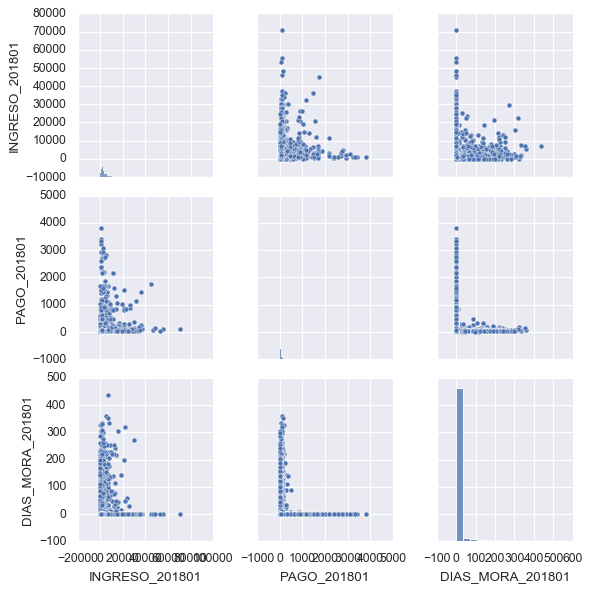

In [24]:
sns.pairplot(
    df_credit,
    #PORCENTAJE_BAJAS_GF_201801
    x_vars=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"],
    y_vars=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"],
    #TIPO_PAGO
)

In [25]:
dimensions_correlation=["INGRESO_201801", "PAGO_201801", "DIAS_MORA_201801"]
fig = px.scatter_matrix(df_credit,dimensions=dimensions_correlation)
fig.show()

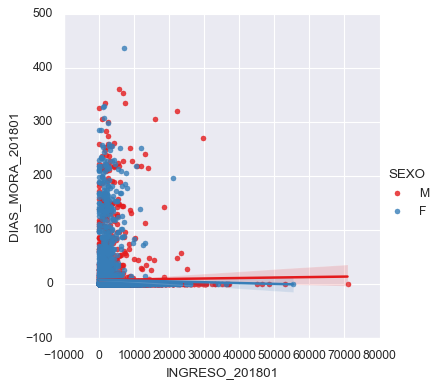

In [26]:
g = sns.lmplot(x="INGRESO_201801", y="DIAS_MORA_201801", hue="SEXO", data=df_credit,palette="Set1")

## Analisis de variables 

### Analisis univariado

In [27]:
fig_hist_age = px.histogram(df_credit,x ='EDAD_AFIL',title="")
fig_hist_age.show()


In [28]:
fig_hist_segmento = px.histogram(df_credit,x ='SEGMENTO',title="")
fig_hist_segmento.show()


### Analisis Bivariado

#### Graficos de dispersion

![alt text](https://datapeaker.com/wp-content/uploads/2021/08/image4-1-4052764.png)

In [29]:
# grafico de dispersion entre pago y dias de mora
fig = px.scatter(df_credit, x="PAGO_201801", y="DIAS_MORA_201801", color="SEGMENTO")
fig.show()

In [30]:
# grafico de dispersion  entre dias de mora con la edad del afiliado
fig = px.scatter(df_credit, x="DIAS_MORA_202001", y="EDAD_AFIL",color ='CATEGORIA')
fig.show()

### Coeficiente de correlacion de Pearson

In [31]:
df_credit.corr(method="pearson")

ID  INGRESO_201710  INGRESO_201711  INGRESO_201712  \
ID              1.000000       -0.209304       -0.209128       -0.205281   
INGRESO_201710 -0.209304        1.000000        0.999918        0.996848   
INGRESO_201711 -0.209128        0.999918        1.000000        0.996937   
INGRESO_201712 -0.205281        0.996848        0.996937        1.000000   
INGRESO_201801 -0.205378        0.996264        0.996348        0.999006   
...                  ...             ...             ...             ...   
vp_primas      -0.614297        0.175550        0.175551        0.177145   
vp_siniestros  -0.411084        0.085551        0.085571        0.086538   
vp_tecnico     -0.093167        0.058775        0.058750        0.059029   
vp_gastos      -0.607384        0.170968        0.170839        0.172044   
VP_OPERATIVO    0.004276        0.033618        0.033612        0.033714   

                INGRESO_201801  INGRESO_201802  INGRESO_201803  \
ID                   -0.205378       -0.205378       -0.103519   
INGRESO_201710        0.996264        0.996264        0.578967   
INGRESO_201711        0.996348        0.996348        0.578962   
INGRESO_201712        0.999006        0.999006        0.579826   
INGRESO_201801        1.000000        1.000000        0.580200   
...                        ...             ...             ...   
vp_primas             0.176619        0.176619        0.097945   
vp_siniestros         0.086495        0.086495        0.047844   
vp_tecnico            0.058570        0.058570        0.032654   
vp_gastos             0.171864        0.171864        0.092114   
VP_OPERATIVO          0.033281        0.033281        0.019128   

                INGRESO_201804  INGRESO_201805  INGRESO_201806  ...  \
ID                   -0.202023       -0.125341       -0.125341  ...   
INGRESO_201710        0.994589        0.651270        0.651270  ...   
INGRESO_201711        0.994670        0.651274        0.651274  ...   
INGRESO_201712        0.997671        0.653253        0.653253  ...   
INGRESO_201801        0.998195        0.653026        0.653026  ...   
...                        ...             ...             ...  ...   
vp_primas             0.175160        0.120680        0.120680  ...   
vp_siniestros         0.084408        0.053812        0.053812  ...   
vp_tecnico            0.059913        0.047062        0.047062  ...   
vp_gastos             0.170291        0.115055        0.115055  ...   
VP_OPERATIVO          0.034854        0.030117        0.030117  ...   

                DIAS_MORA_201911  DIAS_MORA_201912  DIAS_MORA_202001  \
ID                      0.079655          0.083427          0.089567   
INGRESO_201710         -0.069424         -0.069620         -0.072082   
INGRESO_201711         -0.069492         -0.069693         -0.072153   
INGRESO_201712         -0.069547         -0.068909         -0.071783   
INGRESO_201801         -0.069348         -0.068699         -0.071689   
...                          ...               ...               ...   
vp_primas              -0.119407         -0.121148         -0.120319   
vp_siniestros          -0.071858         -0.078843         -0.079958   
vp_tecnico             -0.025646         -0.019378         -0.017597   
vp_gastos              -0.132261         -0.132887         -0.131084   
VP_OPERATIVO           -0.003225          0.003510          0.005037   

                EDAD_AFIL_MESES  EDAD_AFIL  vp_primas  vp_siniestros  \
ID                    -0.876663  -0.876673  -0.614297      -0.411084   
INGRESO_201710         0.101303   0.101732   0.175550       0.085551   
INGRESO_201711         0.101105   0.101534   0.175551       0.085571   
INGRESO_201712         0.098067   0.098505   0.177145       0.086538   
INGRESO_201801         0.098121   0.098560   0.176619       0.086495   
...                         ...        ...        ...            ...   
vp_primas              0.728387   0.728457   1.000000       0.687046   
vp_siniestros         

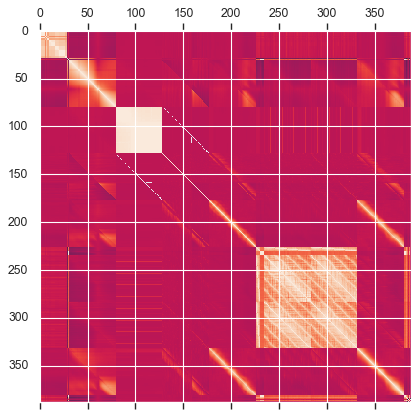

In [32]:
plt.matshow(df_credit.corr())

In [33]:
#heat_map = sns.heatmap(df_credit)

In [34]:
df_dropna = df_credit_imputation.dropna()

NameError: name 'df_credit_imputation' is not defined

# 4. Visualizacion de los datos

In [ ]:
## grafica de las variables par ve freceuncias
plt.rcParams["figure.figsize"] = [7.,7.]
df_credit['INGRESO_201710'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
fig_bar_chart = px.bar(df_dropna,x = 'SEGMENTO',y ='EDAD_AFIL', title='Grupo de segmento por edad del Afiliado',
                       color ='SEXO',height=700,
                       orientation = "v",
                       template="plotly_white",
                       color_discrete_map={
                      "M": "blue",
                      "F": "red",
                      },
                      color_discrete_sequence=px.colors.qualitative.G10,
                       #opacity=1.0,
                      barmode ='group')
fig.update_traces(opacity=1.0)
fig_bar_chart.show()

In [ ]:
fig_bar_age_pago = px.bar(df_dropna,x = 'TIPO_PAGO',y ='EDAD_AFIL',
                       title='Tipo de pago por categoria de segmento',
                       color ='SEGMENTO',height=700)
#fig_bar_age_pago.update_traces(opacity=1.0)
fig_bar_age_pago.show()

In [ ]:
#@title Texto de título predeterminado
fig_bar_sex_smoke = px.bar(df_dropna,x = "SEXO",y = "EDAD_AFIL",color = "FLG_FUMADOR",
                           barmode="group",
                           title = '',
                           orientation = 'v')
fig_bar_sex_smoke.show()

# 4. Preparar y limpiar los datos (Data preparation)


## Data Transformation

### Remove Columns

In [ ]:
# verificacion de nulos (cantidad)
df_credit.isnull().sum()

### Transform columns in upper case

## Data Reduction


### Feature Selection





### PCA

## Data Cleaning

## Missing Values

### Copia del Dataframe inicial

In [ ]:
df_credit_imputation = df_credit.copy()
df_credit_imputation.head(2)

### Imputacion de variable Ingresos

#### Remove NaN

#### Look for missing values

In [ ]:
# verificacion de valores nulos por columna
df_credit_imputation.isnull().sum()

#### Data imputation

In [ ]:
# seleccionar columna de imputacion
df_credit_imputation[['INGRESO_201710']]

In [ ]:
imp_ingreso_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_ingreso_mean.fit(df_credit_imputation[['INGRESO_201710']])
df_credit_imputation["INGRESO_201710"] = imp_ingreso_mean.transform(df_credit_imputation[['INGRESO_201710']])

In [ ]:
# verificacion de valores nulos por columna
df_credit_imputation[["INGRESO_201710"]].isnull().sum()

### Francy Atrittion

In [ ]:
## grafica de las variables par ve freceuncias
plt.rcParams["figure.figsize"] = [5.,5.]
df_credit_imputation['Attrition_Sistema_202001'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
## grafica de las variables par ver freceuncias
plt.rcParams["figure.figsize"] = [5.,5.]
df_credit_imputation['ATTRITION_MOROSIDAD_202001'].hist()
#df_credit[].drop([],1).hist()
plt.show()

In [ ]:
df_credit_imputation['Attrition_Sistema_202001'].describe()

In [ ]:
df_credit_imputation['ATTRITION_MOROSIDAD_202001'].describe()

In [ ]:
df_credit_imputation.groupby('ATTRITION_MOROSIDAD_202001').count()

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('ATTRITION_MOROSIDAD_202001')['ATTRITION_MOROSIDAD_202001'].count()

#### Look for missing values

In [ ]:
print('Números de Registros:', len(df_credit_imputation['Attrition_Sistema_202001']))
print('Número de Nulos:', df_credit_imputation['Attrition_Sistema_202001'].isnull().sum())
print('Proporción de Nulos:',round(df_credit_imputation['Attrition_Sistema_202001'].isnull().sum() * 100 
                                   / len(df_credit_imputation['Attrition_Sistema_202001']),2) , "%")

#### Data imputation

In [ ]:
# imputacion
imp_at = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_at.fit(df_credit_imputation[['Attrition_Sistema_202001']])
df_credit_imputation["Attrition_Sistema_202001"]=imp_at.transform(df_credit_imputation[['Attrition_Sistema_202001']])

In [ ]:
# % nulos luego de imputacion
df_credit_imputation["Attrition_Sistema_202001"].isnull().sum()/len(df_credit_imputation['Attrition_Sistema_202001'])

### Jonathan Pagos

#### Look for missing values

In [ ]:
# % de nulos
df_credit_imputation["PAGO_201610"].isnull().sum()/len(df_credit_imputation)

#### Data imputation

In [ ]:
# imputacion
imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp.fit(df_credit_imputation[["PAGO_201610"]])
df_credit_imputation["PAGO_201610"] = imp.transform(df_credit_imputation[["PAGO_201610"]])

In [ ]:
# % nulos luego de imputacion
df_credit_imputation["PAGO_201610"].isnull().sum()/len(df_credit_imputation)

In [ ]:
plt.boxplot(df_credit_imputation["PAGO_201610"],vert=False)
plt.show()

### Diego Dias_Mora

#### Look for missing values

In [ ]:
# cantidad de valores totales
len(df_credit_imputation)

# cantidad de valores nulos por columna
df_credit_imputation[["DIAS_MORA_201603​"]].isnull().sum()

In [ ]:
% de valores nulos
df_credit_imputation[["DIAS_MORA_201603​"]].isnull().sum()/len(df_credit_imputation)

In [ ]:
# verificar columna a imputar
df_credit_imputation[['INGRESO_201710']]

#### Data imputation

### Rodolfo (Tipo_pago)

#### Look for missing values

In [ ]:
print('Números de registros', len(df_credit_imputation['TIPO_PAGO']))

In [ ]:
# analizar nulos
print('número de nulos', df_credit_imputation['TIPO_PAGO'].isnull().sum())
print(df_credit_imputation['TIPO_PAGO'].isnull().sum() * 100 / len(df_credit_imputation['TIPO_PAGO']) , "%")

In [ ]:
# analizar no nulos
df_credit_imputation['TIPO_PAGO'].describe(include = 'all')

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('TIPO_PAGO')['TIPO_PAGO'].count()

In [ ]:
df_credit_imputation.groupby('TIPO_PAGO').size().plot(kind='pie', autopct='%.2f')

#### Data imputation

In [ ]:
#Imputando con la moda
imp = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imp.fit(df_credit_imputation[['TIPO_PAGO']])
df_credit_imputation['TIPO_PAGO'] = imp.transform(df_credit_imputation[['TIPO_PAGO']])

In [ ]:
# analizar nulos
print('número de nulos', df_credit_imputation['TIPO_PAGO'].isnull().sum())

In [ ]:
#analizando frecuencia
df_credit_imputation.groupby('TIPO_PAGO')['TIPO_PAGO'].count()

In [ ]:
df_credit_imputation.groupby('TIPO_PAGO').size().plot(kind='pie', autopct='%.2f')

### Outliers

In [ ]:
sns.boxplot(x ='CATEGORIA',y = 'EDAD_AFIL',hue='SEXO',data = df_credit)
sns.despine(offset=10,trim=True)

In [ ]:
# analsis de valores atipicos de la edad del afiliado
fig_box_age_afil = px.box(df_dropna,x = 'SEXO',y = 'EDAD_AFIL',points = 'all',color = 'FLG_FUMADOR',title = 'Grafico de boxplot de sexo vs la edad del afiliado')
fig_box_age_afil.show()

### Duplicate Data

#### Drop duplicate

# 4. Modelado.  

 # 5. Evaluacion de Modelo.

# 6. Despliegue.

In [ ]:
df_credit[["vp_primas","vp_siniestros","vp_tecnico","vp_gastos","VP_OPERATIVO","INGRESO_201711","EDAD_AFIL","DEPARTAMENTO","P"]]

In [ ]:
df_dropna[["INGRESO_201711","ATTRITION_MOROSIDAD_201710","EDAD_AFIL","PRIMA_2017","TIPO_PAGO","TAMAÑO_GF_201711","SEGMENTO"]]